This project will process images of Mario and Luigi from SuperMario to test if machines can identify the difference between the images. It will walk through loading and processing images to build models that can automatically detect Mario or Luigi. 

First the relevant packages will be loaded and test the packages are working

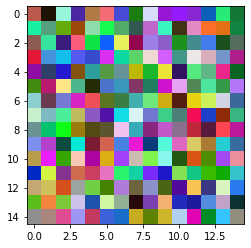

In [1]:
#import the relevant packages
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import numpy as np
from PIL import Image

# test to ensure correct packages are working
test_data = np.random.beta(1, 1, size=(15, 15, 3))

# display the test_data
plt.imshow(test_data)

Pillow is used to first load a jpeg image of Mario, then to display it and print out the dimensions of the image. 

Mario is: (107, 126)


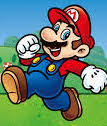

In [2]:
# open image
mario = Image.open('mario.jpeg')

# discover the size of the image
mario_size = mario.size

print("Mario is: {}".format(mario_size))

# view the image
mario

We can then use resize, rotate and flip the image to try out data augmentation for image classification.

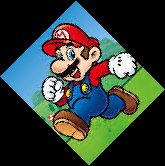

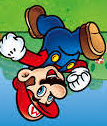

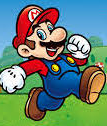

In [3]:
#rotate Mario by 45 degrees and expand image by 10
rotate_mario = mario.rotate(45, expand=10)
display(rotate_mario)

# turn Mario upside down by rotating image by 180 degrees
mario_upside_down = mario.rotate(180)
display(mario_upside_down)

# flip mario left to right
flip_mario = mario.transpose(Image.FLIP_LEFT_RIGHT)
display(flip_mario)

To understand how to use images as data we can change the colour channels to orange and red. 

Below it shows the underlying data has a three-dimensional matrix the width of the image being 107, the height of the matrix is the height of the image being 126, and the depth of the matrix is the number of channels as 3. So, as we saw, the height and width of our image are both 100 pixels. This means that the underlying mario image has the dimensions 126x107x3.

the NumPy array has the shape: (126, 107, 3)


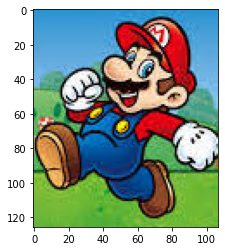

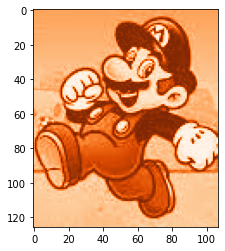

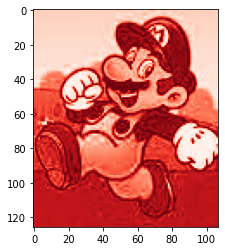

In [4]:
# convert mario into a NumPy array
mario_array = np.array(mario)

# find the shape of mario
mario_shape = mario_array.shape

print("the NumPy array has the shape: {}".format(mario_shape))

# plot the data of mario_shape`
plt.imshow(mario_array)

#show the image 
plt.show()

# plot mario with orange channel
plt.imshow(mario_array[:, :, 1], cmap=plt.cm.Oranges_r)

#show mario with orange channel
plt.show()

# plot mario with the red channel
plt.imshow(mario_array[:, :, 2], cmap=plt.cm.Reds_r)

#show mario with red channel
plt.show()

The colour channel will be explored as it is useful when building models or detect the differences between images.

Below will show the kernel density estimate for each channel on one plot to show the difference.


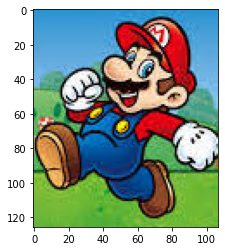

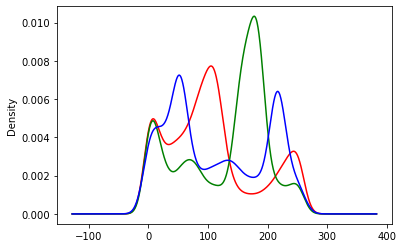

In [5]:
# plot the data of mario_shape`
plt.imshow(mario_array)

#show the image 
plt.show()

def kernel_plot(channel, color):
    """ Plots a kernel density estimate for the given data.
        
        `channel` must be a 2d array
        `color` must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels
channels = ['r', 'g', 'b']
    
def colour_rgb(mario_array):
    # use enumerate to loop over colors and indexes
    for ix, color in enumerate(channels):
        kernel_plot(mario_array[:, :, ix], color)
        
    plt.show()

colour_rgb(mario_array)

It is clear from above that the green line is high showing strong density for the colour green. The colour blue is further to the right than green suggesting that is more of that colour in the image than blue. Red is the furthest to the right show there is more of this colour.

When visually looking at the image of mario we can see this makes sense with the chart.

To make a comparison between different images a jpeg image of Luigi is loaded below. Following similar steps to Mario by converting to a numpy array and then analysing the colour channel and kernel density.

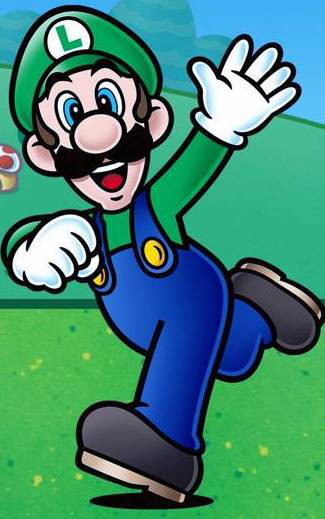

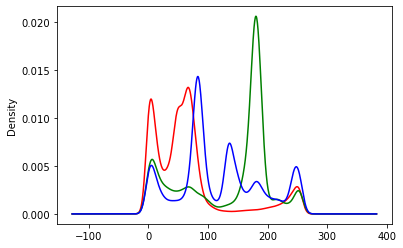

In [6]:
# load the luigi image 
luigi = Image.open('luigi.jpeg')

# show luigi
display(luigi)

# NumPy array of luigi
luigi_array = np.array(luigi)

# plot the colour densities of luigi
colour_rgb(luigi_array)

It is clear from Luigi's colour density that red is the lesser found colour within the image. Blue is found more in the image with slightly more density but green is the most dense and further right than red. 

This makes sense when visually looking at the image. It is clear green and blue are the most dominant colours with only a small amount of red. 

Information on colour can be interesting however because these images share similar colours of red, green and blue it could be easier to distinguish between them if they are converted to black and white or greyscale. 

Because we change the number of color "channels," the shape of our array changes with this change. It also will be interesting to look at how the KDE of the grayscale version compares to the RGB version above.


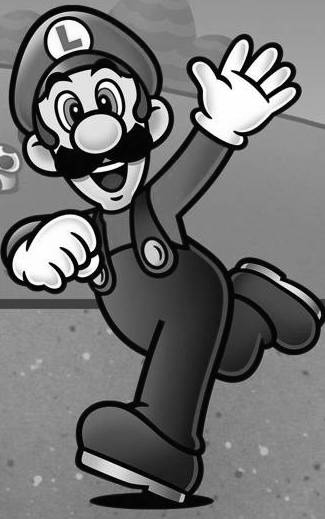

Luigi's NumPy array shape is: (519, 325)


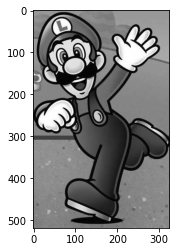

<AxesSubplot:ylabel='Density'>

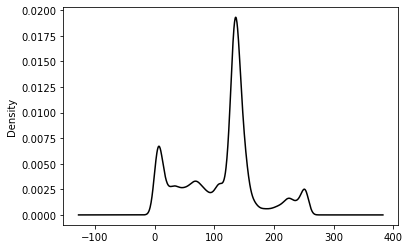

In [7]:
# convert luigi to grayscale
grey_luigi = luigi.convert("L")
display(grey_luigi)

# convert grey luigi to a NumPy array
grey_luigi_array = np.array(grey_luigi)

# get grey luigi's shape of array
grey_luigi_shape = grey_luigi_array.shape

#print grey luigi's shape
print("Luigi's NumPy array shape is: {}".format(grey_luigi_shape))

# plot grey luigi's array
plt.imshow(grey_luigi_array, cmap=plt.cm.gray)

#show the plot
plt.show()

# plot the kernel density estimate of grey luigi
kernel_plot(grey_luigi_array, 'k')

The difference in the greyscale channel compared to the original luigi with only a black line. 

The grey luigi will be clipped to create greater contrast to be saved for future use in a machine learning pipeline. First grey luigi will be changed to the NumPy version of the data then the image will be clipped by replace all numbers in the array lower than 100 to 100. This improves the contrast and reduces the range of values. Then returning to an image shown below.


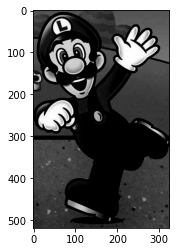

In [8]:
# create higher contrast by reducing range
grey_luigi_contrast_array = np.maximum(grey_luigi_array, 100)

# show the higher contrast version
plt.imshow(grey_luigi_contrast_array, cmap=plt.cm.gray)

# convert the NumPy array of high contrast to luigi
contrast_grey_luigi = Image.fromarray(grey_luigi_contrast_array)

# save the high contrast version
contrast_grey_luigi.save("contrast_grey_luigi.jpg")

To create an image processing pipeline we will first load the images and create paths to save the images. Then convert the image to grayscale and saving the new grayscale image after
rotating, cropping and zoomming in on the image.

Processing the previous images of mario and luigi but also trying new images of Yoshi, Princess Peach and Browser. We can test if the conversion work with Yoshi by viewing him before and after.

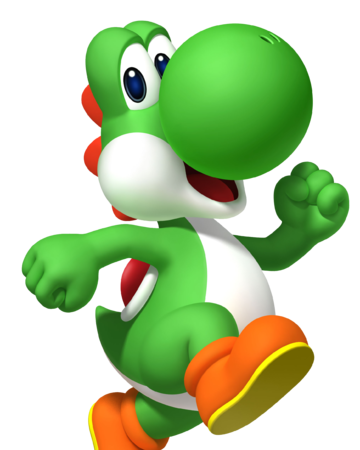

In [29]:
# open original yoshi
yoshi = Image.open('yoshi.png')

# view original yoshi
yoshi


In [34]:
#create a image file path
image_paths = ['mario.jpeg', 'luigi.jpeg', 'yoshi.png', 'ppeach.png', 'browser.png']

#create variable
def processing(path):
    img = Image.open(path)

    # create paths to save files to
    bw_path = "bw_{}.jpg".format(path.stem)
    rcz_path = "rcz_{}.jpg".format(path.stem)

    print("Creating grayscale version of {} and saving to {}.".format(path, bw_path))
    bw = img.convert("L")
    bw.save(bw_path)
    
    print("Creating rotated, cropped, and zoomed version of {} and saving to {}.".format(path, rcz_path))
    rcz = bw.rotate(45).crop([25, 25, 75, 75]).resize((100, 100))
    rcz.save(rcz_path)


# for loop over image paths
for img_path in image_paths:
    processing(Path(img_path))



Creating grayscale version of mario.jpeg and saving to bw_mario.jpg.
Creating rotated, cropped, and zoomed version of mario.jpeg and saving to rcz_mario.jpg.
Creating grayscale version of luigi.jpeg and saving to bw_luigi.jpg.
Creating rotated, cropped, and zoomed version of luigi.jpeg and saving to rcz_luigi.jpg.
Creating grayscale version of yoshi.png and saving to bw_yoshi.jpg.
Creating rotated, cropped, and zoomed version of yoshi.png and saving to rcz_yoshi.jpg.
Creating grayscale version of ppeach.png and saving to bw_ppeach.jpg.
Creating rotated, cropped, and zoomed version of ppeach.png and saving to rcz_ppeach.jpg.
Creating grayscale version of browser.png and saving to bw_browser.jpg.
Creating rotated, cropped, and zoomed version of browser.png and saving to rcz_browser.jpg.


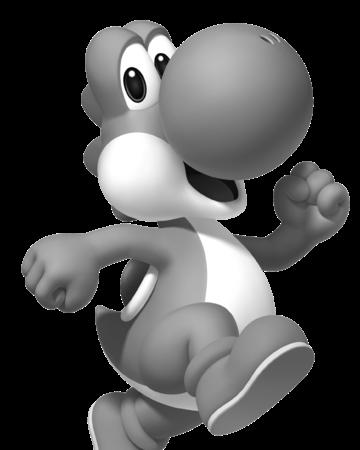

In [35]:
# open original yoshi
yoshi2 = Image.open('bw_yoshi.jpg')

# view original yoshi
yoshi2